<a href="https://colab.research.google.com/github/BernTomaz/BernTomaz.github.io/blob/main/transfer_learning_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import os
import zipfile
import matplotlib.pyplot as plt


In [21]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip


--2024-12-26 18:22:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.2’

cats_and_dogs_filte 100%[===================>]  65.43M   276MB/s    in 0.2s    

2024-12-26 18:22:57 (276 MB/s) - ‘cats_and_dogs_filtered.zip.2’ saved [68606236/68606236]

Archive:  cats_and_dogs_filtered.zip
replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: cats_and_dogs_filtered/vectorize.py  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: c

In [22]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


Found 2000 images belonging to 2 classes.


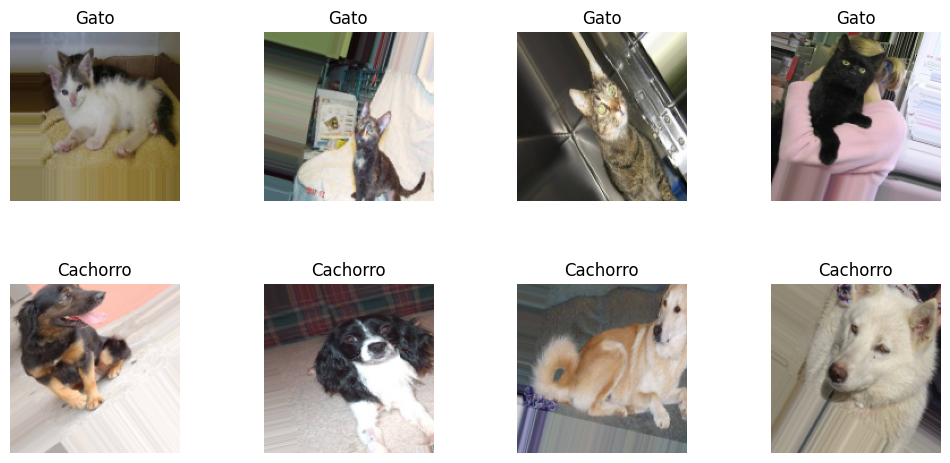

In [23]:
import matplotlib.pyplot as plt
import numpy as np


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='binary',
    target_size=(150, 150)
)


sample_batch, labels_batch = next(train_generator)
# Filtrar as 4 primeiras imagens de cada classe (gato = 0, cachorro = 1)
cat_images = sample_batch[labels_batch == 0][:4]  # 4 imagens da classe 0 (gatos)
dog_images = sample_batch[labels_batch == 1][:4]  # 4 imagens da classe 1 (cachorros)


fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Exibir as imagens de gatos
for i in range(4):
    axes[0, i].imshow(cat_images[i])
    axes[0, i].set_title('Gato')
    axes[0, i].axis('off')

# Exibir as imagens de cachorros
for i in range(4):
    axes[1, i].imshow(dog_images[i])
    axes[1, i].set_title('Cachorro')
    axes[1, i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()




In [24]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


base_model.trainable = False


In [25]:

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

# Criar o modelo final
model = Model(inputs=base_model.input, outputs=x)


In [26]:
# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [27]:
# Treinar o modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 705s 11s/step - accuracy: 0.6456 - loss: 0.8675 - val_accuracy: 0.8679 - val_loss: 0.3127
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8125 - loss: 0.3848 - val_accuracy: 0.8750 - val_loss: 0.2552
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 730s 11s/step - accuracy: 0.8050 - loss: 0.4086 - val_accuracy: 0.8841 - val_loss: 0.2861
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.7500 - loss: 0.5037 - val_accuracy: 0.8750 - val_loss: 0.2417
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 701s 11s/step - accuracy: 0.8196 - loss: 0.3970 - val_accuracy: 0.8438 - val_loss: 0.3305
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.6875 - loss: 0.7522 - val_accuracy: 0.8750 - val_loss: 0.3170
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 702s 11s/step - accuracy: 0.8100 - loss: 0.3931 - val_accuracy: 0.8841 - val_loss: 0.2670
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8438 - loss: 0.3209 - val_accuracy: 0.875

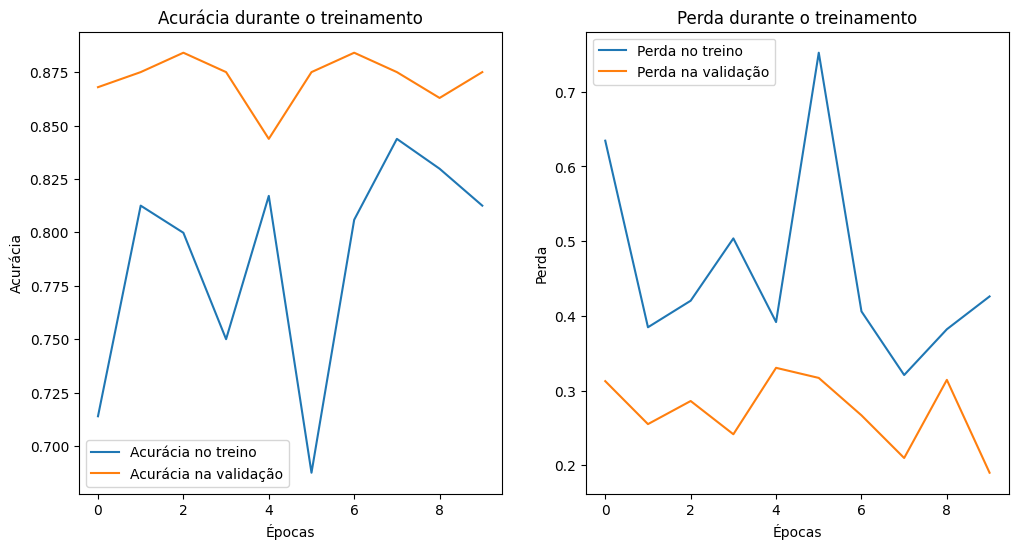

In [28]:
import matplotlib.pyplot as plt

# Exibir gráficos de precisão e perda
plt.figure(figsize=(12, 6))

# Gráfico de precisão
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia no treino')
plt.plot(history.history['val_accuracy'], label='Acurácia na validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico de perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda no treino')
plt.plot(history.history['val_loss'], label='Perda na validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.show()
